In [105]:
import pandas as pd
import matplotlib.pyplot as plt

import matplotlib.font_manager as fm
font_path = 'C:/Windows/Fonts/malgun.ttf'
font_prop = fm.FontProperties(fname=font_path, size=12)
plt.rcParams['font.family'] = font_prop.get_name()
plt.rcParams['axes.unicode_minus'] = False

df = pd.read_csv('merged_data.csv')
df = df.drop(columns=['시점', '학생수', '어린이집', '인구밀집도', '인터넷이용률', '수술인원'])
df.head(), df.shape, df['지역별'].unique()


(  지역별  저출산율  고용률  사설학원수  사교육참여율  근로시간  이동인구수 주택유형별 주택규모별  ratio
 0  강원  1.60  NaN    NaN     NaN   NaN    NaN   NaN   NaN    NaN
 1  경기  1.63  NaN    NaN     NaN   NaN    NaN   NaN   NaN    NaN
 2  경남  1.59  NaN    NaN     NaN   NaN    NaN   NaN   NaN    NaN
 3  경북  1.58  NaN    NaN     NaN   NaN    NaN   NaN   NaN    NaN
 4  광주  1.64  NaN    NaN     NaN   NaN    NaN   NaN   NaN    NaN,
 (9990, 10),
 array(['강원', '경기', '경남', '경북', '광주', '대구', '대전', '부산', '서울', '세종', '울산',
        '인천', '전남', '전북', '제주', '충남', '충북', '경상', '충청', '광역시', '대도시외',
        '세종특별자치시', '전라'], dtype=object))

In [106]:
# object → int
from sklearn.preprocessing import LabelEncoder

le_disaster = LabelEncoder()
df['지역별'] = le_disaster.fit_transform(df['지역별'])
df['주택유형별'] = le_disaster.fit_transform(df['주택유형별'])
df['주택규모별'] = le_disaster.fit_transform(df['주택규모별'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9990 entries, 0 to 9989
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   지역별     9990 non-null   int32  
 1   저출산율    5766 non-null   float64
 2   고용률     3752 non-null   float64
 3   사설학원수   5046 non-null   float64
 4   사교육참여율  3870 non-null   float64
 5   근로시간    3414 non-null   float64
 6   이동인구수   4044 non-null   float64
 7   주택유형별   9990 non-null   int32  
 8   주택규모별   9990 non-null   int32  
 9   ratio   4140 non-null   float64
dtypes: float64(7), int32(3)
memory usage: 663.5 KB


In [107]:
# 결측치
# df.isnull().sum()
df_copy = df.dropna()
df_copy.isnull().sum()

# # 데이터 저장
# df_copy.to_csv('final_merged_data.csv', index=False)

지역별       0
저출산율      0
고용률       0
사설학원수     0
사교육참여율    0
근로시간      0
이동인구수     0
주택유형별     0
주택규모별     0
ratio     0
dtype: int64

<Axes: >

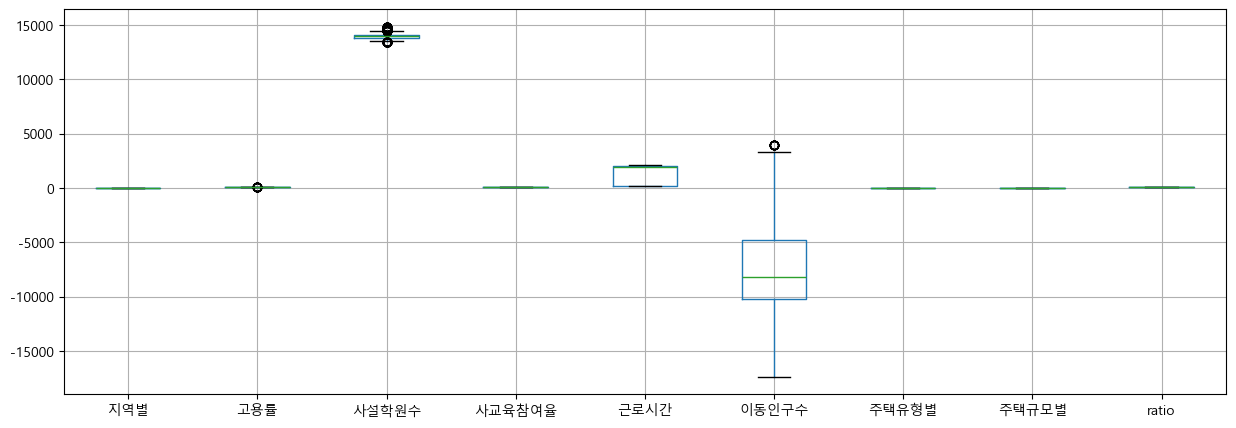

In [108]:
# 이상치 확인
df_copy.drop('저출산율', axis=1).boxplot(figsize=(15,5))

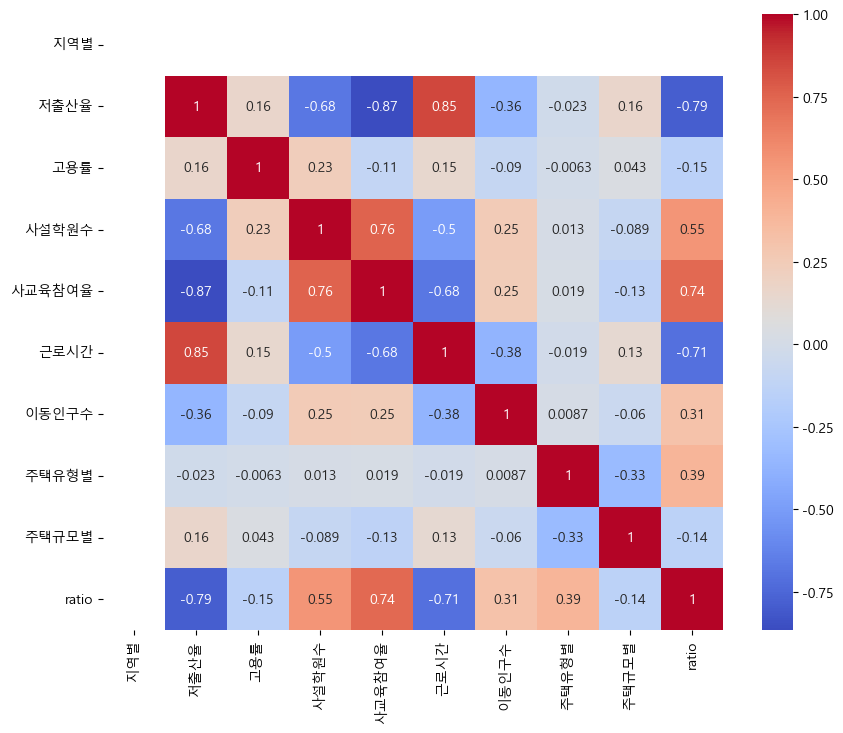

In [109]:
# 상관관계
import seaborn as sns

corr_mat = df_copy.corr()
plt.figure(figsize = (10,8))
sns.heatmap(corr_mat, annot = True, cmap = 'coolwarm')
plt.show()

In [110]:
# 왜도 확인
df_copy.skew()

지역별       0.000000
저출산율      0.122307
고용률      -0.743333
사설학원수     0.455228
사교육참여율    0.497502
근로시간     -0.589459
이동인구수     0.433999
주택유형별     0.459243
주택규모별     0.223252
ratio    -0.649867
dtype: float64

In [111]:
# 통계 요약 정보
df_copy.describe()

,지역별,저출산율,고용률,사설학원수,사교육참여율,근로시간,이동인구수,주택유형별,주택규모별,ratio
count,1190.0,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000
mean,11.0,0.790286,59.892437,14003.294118,78.031555,1360.077983,-7643.500840,0.388235,2.347059,90.679058
std,0.0,0.162242,0.686033,300.593894,3.621879,862.408241,4109.108985,0.487553,1.484902,9.156252
min,11.0,0.550000,57.300000,13405.000000,73.500000,151.200000,-17393.000000,0.000000,0.000000,67.332000
25%,11.0,0.630000,59.500000,13859.000000,74.500000,164.200000,-10250.750000,0.000000,1.000000,83.838000
50%,11.0,0.760000,59.900000,14009.000000,77.600000,1951.200000,-8190.000000,0.000000,2.000000,92.526000
75%,11.0,0.970000,60.400000,14107.000000,79.983000,2041.200000,-4818.500000,1.000000,3.000000,96.972000
max,11.0,1.060000,61.000000,14832.000000,84.800000,2103.600000,3946.000000,1.000000,5.000000,105.060000


In [112]:
select_df = df_copy[['사설학원수', '사교육참여율', '근로시간', '저출산율']]
select_df.head(), select_df.shape

(        사설학원수  사교육참여율    근로시간  저출산율
 2570  13688.0    73.5  1945.2  1.06
 2571  13688.0    73.5  1945.2  1.06
 2572  13688.0    73.5  1945.2  1.06
 2573  13688.0    73.5  1945.2  1.06
 2574  13688.0    73.5  1945.2  1.06,
 (1190, 4))

In [113]:
# 데이터 분리
from sklearn.model_selection import train_test_split

X = df_copy.drop(columns=['저출산율'])
y = df_copy['저출산율']
    
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [114]:
# # 데이터 스케일링
# from sklearn.preprocessing import StandardScaler
# scaler = StandardScaler()

# X_train_scaled = scaler.fit_transform(X_train)
# X_test_scaled = scaler.transform(X_test)

Index: 0, Column Name: 지역별
Index: 1, Column Name: 고용률
Index: 2, Column Name: 사설학원수
Index: 3, Column Name: 사교육참여율
Index: 4, Column Name: 근로시간
Index: 5, Column Name: 이동인구수
Index: 6, Column Name: 주택유형별
Index: 7, Column Name: 주택규모별
Index: 8, Column Name: ratio


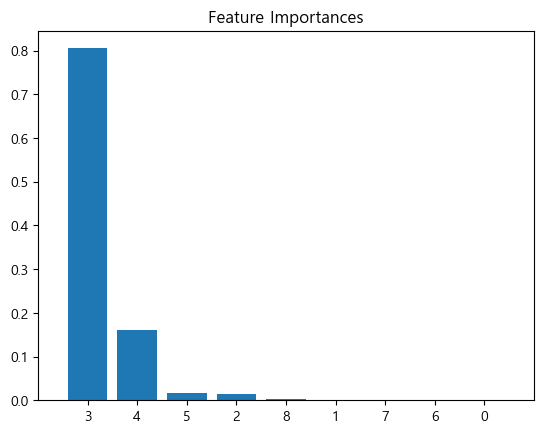

In [115]:
import numpy as np
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt

for index, column in enumerate(X.columns):
    print(f'Index: {index}, Column Name: {column}')

# 랜덤 포레스트 모델 생성
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# 모델 학습
rf_model.fit(X_train, y_train)

# 변수 중요도 추출
importances = rf_model.feature_importances_
indices = np.argsort(importances)[::-1]

# 중요도 시각화
plt.title('Feature Importances')
plt.bar(range(X.shape[1]), importances[indices], align='center')
plt.xticks(range(X.shape[1]), indices)
plt.xlim([-1, X.shape[1]])
plt.show()